In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df=pd.read_csv(r"C:\Users\Asus\Downloads\archive (3)\Algerian_forest_fires_dataset.csv")

In [7]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
## Drop month,day,year
df.drop(['day','month','year'],axis=1,inplace=True)

In [10]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [11]:
df['Classes'].value_counts()

Classes
fire             131
not fire          97
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [12]:
## Encoding

df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [13]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [14]:
df['Classes'].value_counts()

Classes
1    137
0    102
Name: count, dtype: int64

In [15]:
## independent and dependent features
X=df.drop('FWI',axis=1)
Y=df['FWI']

In [16]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [17]:
Y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [18]:
## Train Test split

from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [20]:
## Feature selection based on correlation

X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.641783,-0.308153,-0.296168,0.672432,0.448325,0.346342,0.584180,0.423963,0.500699,0.264776
RH,-0.641783,1.000000,0.268286,0.212271,-0.619837,-0.389257,-0.207393,-0.672540,-0.332784,-0.415186,-0.411179
Ws,-0.308153,0.268286,1.000000,0.214446,-0.170996,-0.013867,0.072870,0.001026,0.018106,-0.077091,-0.205473
Rain,-0.296168,0.212271,0.214446,1.000000,-0.537003,-0.271244,-0.289736,-0.337133,-0.283302,-0.376481,-0.047533
FFMC,0.672432,-0.619837,-0.170996,-0.537003,1.000000,0.597922,0.510460,0.741852,0.585002,0.763932,0.248456
DMC,0.448325,-0.389257,-0.013867,-0.271244,0.597922,1.000000,0.880141,0.685676,0.984064,0.591706,0.206719
DC,0.346342,-0.207393,0.072870,-0.289736,0.510460,0.880141,1.000000,0.524314,0.948444,0.521804,-0.088626
ISI,0.584180,-0.672540,0.001026,-0.337133,0.741852,0.685676,0.524314,1.000000,0.644623,0.738680,0.291946
BUI,0.423963,-0.332784,0.018106,-0.283302,0.585002,0.984064,0.948444,0.644623,1.000000,0.585566,0.101382
Classes,0.500699,-0.415186,-0.077091,-0.376481,0.763932,0.591706,0.521804,0.738680,0.585566,1.000000,0.169813


<Axes: >

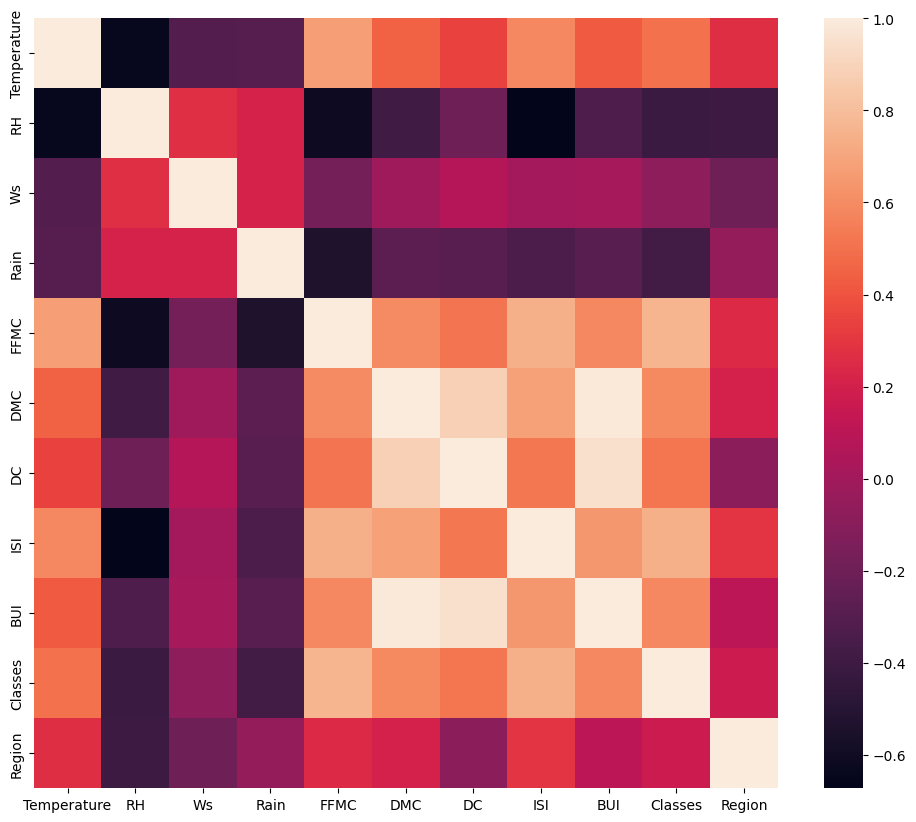

In [21]:
## Check for multicolinearity

plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr)

In [22]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr
                

In [23]:
## threshold _ domain expertise

corr_features=correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [24]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace = True)
X_test.drop(corr_features,axis=1,inplace=True)

X_train.shape,X_test.shape

((179, 9), (60, 9))

## Feature Scalling or Standardization

In [25]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()

In [26]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)


In [27]:
X_train_scaled

array([[-0.85209594,  0.7143791 ,  0.54705955, ..., -0.81068049,
        -1.11242977, -0.94032469],
       [-1.38261829, -0.21900673,  0.91244633, ..., -0.57177399,
        -1.11242977,  1.06346245],
       [-1.64787946,  1.18107202,  0.18167276, ..., -1.07347764,
        -1.11242977, -0.94032469],
       ...,
       [-1.91314063,  0.91439035,  0.54705955, ..., -1.09736829,
        -1.11242977, -0.94032469],
       [ 2.06577695, -1.88576715, -0.54910081, ...,  2.15176011,
         0.89893315,  1.06346245],
       [-0.58683477,  0.98106077,  2.0086067 , ..., -0.88235244,
        -1.11242977, -0.94032469]])

## Box plot to understand Effect Of Standard Scaler

Text(0.5, 1.0, 'X_train Before Scaling')

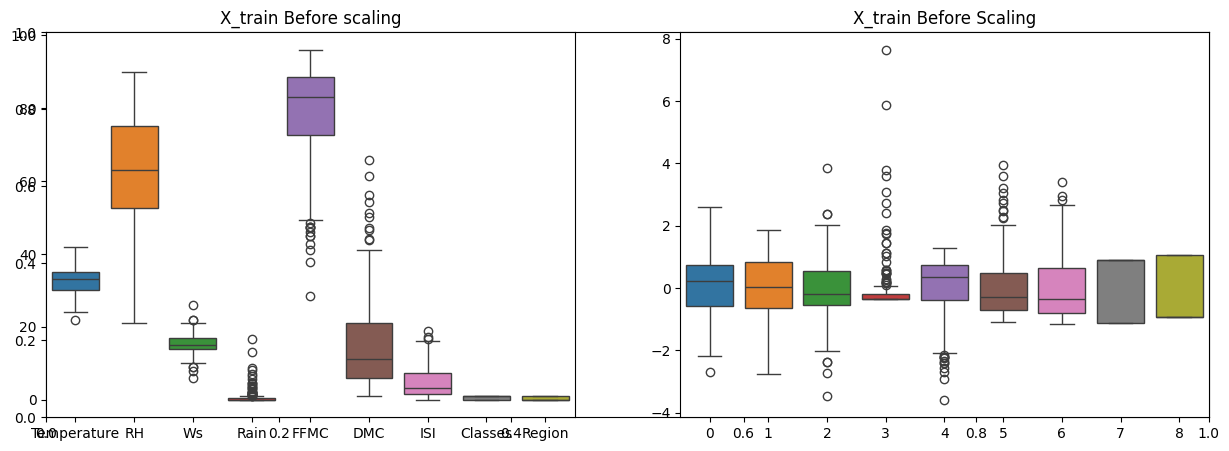

In [28]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before scaling')

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train Before Scaling')

## Linear Regeression model

In [29]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(X_train_scaled,Y_train)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Y_pred=lr.predict(X_test_scaled)
mae=mean_absolute_error(Y_pred,Y_test)

score=r2_score(Y_test,Y_pred)*100


print('mean_absolute_error',mae)
print('r2_score',score)




mean_absolute_error 0.896220159537886
r2_score 96.25629442999043


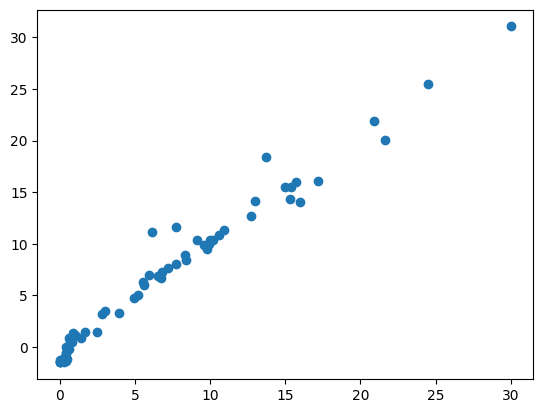

In [30]:
plt.scatter(Y_test,Y_pred)
plt.show()

mean_absolute_error 1.0273504492360714
r2_score 95.65588762659259


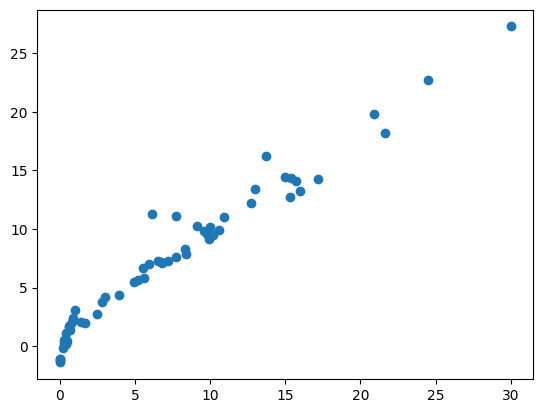

In [31]:
## Lasso Regression

from sklearn.linear_model import Lasso

lasso=Lasso()

lasso.fit(X_train_scaled,Y_train)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(Y_pred,Y_test)

score=r2_score(Y_test,Y_pred)*100


print('mean_absolute_error',mae)
print('r2_score',score)


plt.scatter(Y_test,Y_pred)
plt.show()

In [32]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)

lassocv.fit(X_train_scaled,Y_train)

LassoCV(cv=5)

In [33]:
lassocv.alpha_

0.07452114713880721

In [34]:
lassocv.alphas_


array([6.94986712, 6.48146934, 6.04464   , 5.63725149, 5.25731961,
       4.90299386, 4.57254849, 4.26437402, 3.97696949, 3.70893505,
       3.45896524, 3.22584256, 3.00843157, 2.80567335, 2.61658036,
       2.4402316 , 2.27576816, 2.122389  , 1.97934708, 1.84594572,
       1.72153515, 1.60550945, 1.49730348, 1.39639024, 1.30227821,
       1.21450902, 1.13265517, 1.05631801, 0.98512571, 0.91873153,
       0.8568121 , 0.79906583, 0.74521147, 0.69498671, 0.64814693,
       0.604464  , 0.56372515, 0.52573196, 0.49029939, 0.45725485,
       0.4264374 , 0.39769695, 0.37089351, 0.34589652, 0.32258426,
       0.30084316, 0.28056734, 0.26165804, 0.24402316, 0.22757682,
       0.2122389 , 0.19793471, 0.18459457, 0.17215352, 0.16055094,
       0.14973035, 0.13963902, 0.13022782, 0.1214509 , 0.11326552,
       0.1056318 , 0.09851257, 0.09187315, 0.08568121, 0.07990658,
       0.07452115, 0.06949867, 0.06481469, 0.0604464 , 0.05637251,
       0.0525732 , 0.04902994, 0.04572548, 0.04264374, 0.03976

In [35]:
lassocv.mse_path_

array([[56.75894239, 30.36789859, 52.68987599, 70.98076882, 76.53790491],
       [50.22016164, 26.91525836, 46.76384528, 66.66952845, 76.53790491],
       [44.38261249, 23.89235235, 40.34221046, 60.40629929, 69.17917752],
       [39.26991873, 21.24450215, 34.83382163, 54.90533212, 61.89219979],
       [34.78992317, 18.92416996, 30.11460526, 50.07094929, 55.51876777],
       [30.86263341, 16.88983941, 26.07684307, 44.88094029, 48.2738822 ],
       [27.41805069, 15.10532384, 22.6273988 , 39.28294766, 41.98335566],
       [24.39524475, 13.53916375, 19.685382  , 34.41460851, 36.5220805 ],
       [21.74096447, 12.16383762, 17.1807817 , 30.18011588, 31.78088857],
       [19.40915025, 10.95537608, 15.05284661, 26.49806356, 27.66634609],
       [17.35925116,  9.892872  , 13.2493437 , 23.29588489, 24.09576058],
       [15.55601708,  8.95808569, 11.72472582, 20.51105633, 20.99773935],
       [13.96869025,  8.1350998 , 10.43970395, 18.08919987, 18.3102255 ],
       [12.57042677,  7.4100304 ,  9.3

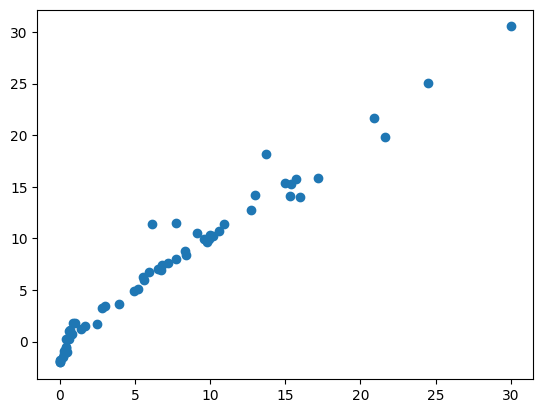

mae 0.8970544471317831
r2_score 96.05884064138952


In [36]:
Y_pred=lassocv.predict(X_test_scaled)


mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)*100

plt.scatter(Y_test,Y_pred)

plt.show()

print('mae',mae)
print('r2_score',score)

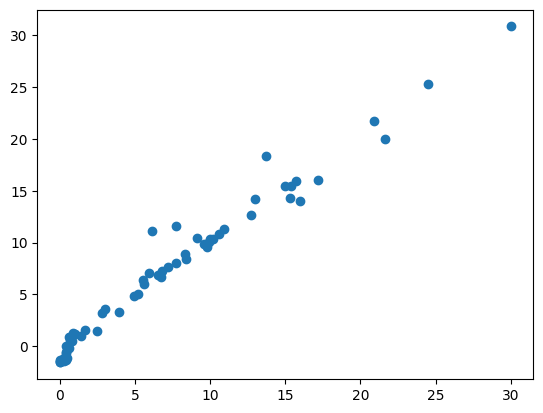

mae 0.8955671187892612
r2_score 96.2342443883294


In [37]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)

ridgecv.fit(X_train_scaled,Y_train)
Y_pred=ridgecv.predict(X_test_scaled)

mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)*100

plt.scatter(Y_test,Y_pred)

plt.show()

print('mae',mae)
print('r2_score',score)

mean_absolute_error 0.8958010292015337
r2_score 96.10191536435535


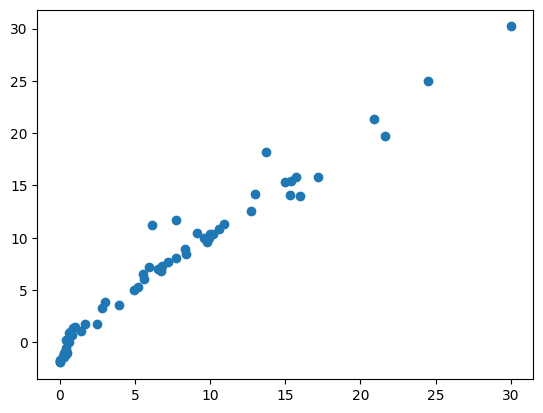

In [44]:

from sklearn.linear_model import Ridge

ridge=Ridge()

ridge.fit(X_train_scaled,Y_train)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Y_pred=en.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,Y_pred)

score=r2_score(Y_test,Y_pred)*100


print('mean_absolute_error',mae)
print('r2_score',score)


plt.scatter(Y_test,Y_pred)

plt.show()

## ElasticNet Regression

mean_absolute_error 0.8958010292015337
r2_score 96.10191536435535


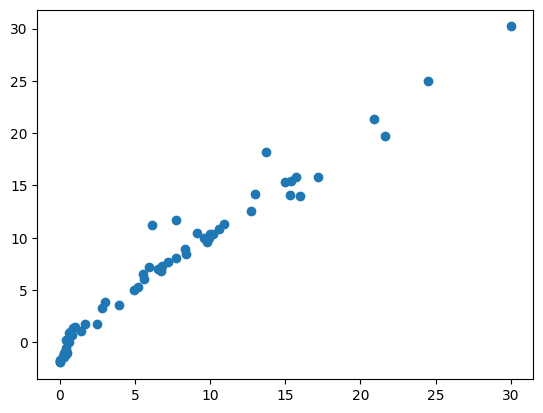

In [45]:

from sklearn.linear_model import ElasticNetCV

en=ElasticNetCV()

en.fit(X_train_scaled,Y_train)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Y_pred=en.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,Y_pred)

score=r2_score(Y_test,Y_pred)*100


print('mean_absolute_error',mae)
print('r2_score',score)


plt.scatter(Y_test,Y_pred)

plt.show()

## Pickle the machine learning mode,preprocessing model standardscaler

In [47]:
scaler

StandardScaler()

In [48]:
ridge

Ridge()

In [ ]:
import pickle

pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))